# Supervised Learning using Multiple Linear Regression to Determine Variables Impacted Flight Delays from COVID-19

## Abstract

In this project, the aim was to determine if COVID-19 had a significant impact on the United States airline industry, and the main causes for delays by using multiple linear regression. The report covers and walks through all the data preprocessing, analysis, machine learning implementation, and performance metrics for the models. The report also discusses improvements that could be made to the data and what critical data is needed to illustrate a future prediction for delays in the airline industry post-COVID.

## Overview and Motivation

I hypothesized instances of delays in the United States airline industry have returned to pre-COVID levels. The reduction in delays is financially favorable for the airlines. This was an interesting investigation for me because I travel for work. During COVID, I experienced quite a few delayed or canceled flights and wanted to know the causes. I thought it may be due to staffing issues due to personnel getting sick from the COVID virus.

## Related Work
The Kaggle dataset listed in the Data section was my main source of data. I also used ChatGPT, by OpenAI, to understand and use machine learning and metrics. ChatGPT is a powerful tool for coding, and this project was my first time using this tool to work through a coding problem. I highly recommend it, because it shortens the path from a prompted coding question to implementation. Any user of this tool must understand that the outputs are only for reference, so the user must work through the outputs and understand if the code works for the application.

## Initial Questions

Airlines have been experiencing frequent delays since the COVID epidemic, and I wanted to understand how severe is this issue and why has it been happening.

For my research topic, I reviewed USA airline travel data to illustrate:
- How many flights are delayed
- The top three causes for the delays
- Ranking airlines by most delayed
- Identify the worst airlines based on maximal delays
- Has the frequency delays decreased over the years

## Data

- The flight delay and cost data used in this analysis came from here: https://www.kaggle.com/datasets/ryanjt/airline-delay-cause

- The flight cost data was from here: https://www.airlines.org/dataset/u-s-passenger-carrier-delay-costs/
The cost was based on 2021 prices which estimated a direct operating cost per minute at $80.52.

In [1]:
# Importing packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in csv data
df = pd.read_csv('FlightDelays_Williams/data/Airline_Delay_Cause.csv')

In [3]:
# Create dataframe
#df=pd.DataFrame(data)

# Show dataframe shape and first 5 rows
print("Shape of data=>",df.shape)
print("Column names=>",df.columns)
df.head()

Shape of data=> (284737, 21)
Column names=> Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5.0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5.0,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5.0,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5.0,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5.0,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


I assumed that arr_delay units are minutes. This was my independent variable of interest.

The airlines report the causes of delays in five broad categories:

    Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.)

    Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

    National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

    Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.

    Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.



### Data Joining/Cleaning

In [4]:
df['airport_name'] = df['airport_name'].astype(str)
# Extract the state name from airport_name column
df['StateInitial'] = df['airport_name'].apply(lambda st: st[st.find(",")+1:st.find(":")])

# Convert categorical variables to object type
df[df.columns[0:2]] = df[df.columns[0:2]].astype(object)

print(df.dtypes)
df.head()

year                    object
month                   object
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
StateInitial            object
dtype: object


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,StateInitial
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,PA
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,GA
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,MA
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,LA
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,GA


In [5]:
# Count how many NaN values in dataframe
print("There are {} number of NaN values in the dataset.".format(df.isnull().sum().sum()))

# Replace all NaN values with 0
df = df.fillna(0)

# Count how many NaN values in dataframe
print("There are {} number of NaN values in the dataset.".format(df.isnull().sum().sum()))

There are 7204 number of NaN values in the dataset.
There are 0 number of NaN values in the dataset.


### Basic Data Characteristics

In [6]:
# Verify the number of airlines
print('Number of Airline companies in the dataset=>',len(df['carrier_name'].unique()))

# Show all the airlines tracked
print('Airlines ->',df['carrier_name'].unique())

# Date range
print('Date range =>{}-{}'.format(df['year'].min(),df['year'].max()))

Number of Airline companies in the dataset=> 33
Airlines -> ['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Envoy Air' 'Spirit Air Lines'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'Horizon Air'
 'United Air Lines Inc.' 'Southwest Airlines Co.' 'Mesa Airlines Inc.'
 'Republic Airline' 'ExpressJet Airlines LLC' 'ExpressJet Airlines Inc.'
 'Virgin America' 'US Airways Inc.' 'AirTran Airways Corporation'
 'American Eagle Airlines Inc.' 'Pinnacle Airlines Inc.'
 'Atlantic Southeast Airlines' 'Continental Air Lines Inc.' 'Comair Inc.'
 'Northwest Airlines Inc.' 'Aloha Airlines Inc.' 'ATA Airlines d/b/a ATA'
 'Independence Air' 'America West Airlines Inc.' 0]
Date range =>2005-2022


There are 33 airlines in the dataset tracked between June 2003 and May 2022. All of the major airlines - such as America, JetBlue, and Delta - are covered in this dataset as well others.

## Exploratory Data Analysis

In [7]:
# How many flights we delayed by year
df_delay_count = df.groupby('year')['arr_delay'].apply(lambda x: (x > 60).sum()).reset_index(name='count')
#print(df_delay_count)

# Normalize data due to 2003 and 2022 not having 12 months of data
df_delay_total = df.groupby('year')['arr_delay'].apply(lambda x: (x >= 0).sum()).reset_index(name='count')
df_delay_count['normalization'] = df_delay_count['count']/df_delay_total['count']

print(df_delay_count.sort_values(by=['normalization'], ascending=False))
print('{:,.0f}% of the flights in this dataset were delayed more than one hour.'.format(df_delay_count['normalization'].mean()*100))

    year  count  normalization
1   2006  17567       0.971089
0   2005   8922       0.968519
2   2007  18903       0.968491
9   2014  13395       0.958155
4   2009  16909       0.956013
3   2008  18118       0.955238
10  2015  12906       0.954021
6   2011  14815       0.950594
8   2013  15286       0.950090
12  2017  11879       0.948954
5   2010  16622       0.945775
7   2012  13583       0.944116
17  2022   7988       0.940872
11  2016  11486       0.940165
14  2019  19566       0.934116
13  2018  15874       0.926408
16  2021  18122       0.908189
15  2020  14582       0.773212
94% of the flights in this dataset were delayed more than one hour.


Surprisingly, based on the normalized data, the COVID years (2020-2022) had the least amount of delays. This is because this data does not include all the flights scheduled by each airline. It only includes flights that experienced some delay or cancellation, so this metric is skewed.

In [8]:
# Find what years with the most cancelled flights
df_cancel_count = df.groupby('year')['arr_cancelled'].apply(lambda x: (x > 0).sum()).reset_index(name='count')
print(df_cancel_count.sort_values(by=['count'], ascending=False))

    year  count
2   2007  13249
14  2019  11918
3   2008  11789
1   2006  11736
5   2010  10923
4   2009  10334
16  2021  10007
6   2011   9556
8   2013   9390
13  2018   9012
15  2020   8886
9   2014   8630
10  2015   8070
7   2012   7791
12  2017   6836
11  2016   6483
0   2005   5958
17  2022   5939


### Visualizations

#### Heat Correlation Map

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,1.00,-0.08,-0.02,-0.06,-0.04,-0.05,-0.06,-0.03,-0.05,0.01,-0.01,-0.03,0.00,-0.02,-0.05,-0.01,-0.03
month,-0.08,1.00,0.00,0.00,0.00,-0.01,-0.00,0.01,0.00,-0.05,-0.00,-0.00,-0.00,-0.02,-0.00,0.01,-0.00
arr_flights,-0.02,0.00,1.00,0.92,0.89,0.64,0.81,0.46,0.88,0.48,0.64,0.88,0.88,0.63,0.70,0.40,0.85
arr_del15,-0.06,0.00,0.92,1.00,0.92,0.70,0.92,0.48,0.94,0.50,0.67,0.97,0.89,0.69,0.84,0.41,0.94
carrier_ct,-0.04,0.00,0.89,0.92,1.00,0.71,0.75,0.50,0.85,0.45,0.60,0.88,0.94,0.69,0.65,0.43,0.84
weather_ct,-0.05,-0.01,0.64,0.70,0.71,1.00,0.61,0.33,0.58,0.38,0.55,0.71,0.72,0.94,0.56,0.29,0.60
nas_ct,-0.06,-0.00,0.81,0.92,0.75,0.61,1.00,0.38,0.78,0.47,0.62,0.91,0.76,0.61,0.95,0.33,0.80
security_ct,-0.03,0.01,0.46,0.48,0.50,0.33,0.38,1.00,0.48,0.21,0.31,0.43,0.43,0.31,0.31,0.83,0.44
late_aircraft_ct,-0.05,0.00,0.88,0.94,0.85,0.58,0.78,0.48,1.00,0.47,0.63,0.91,0.81,0.59,0.70,0.39,0.98
arr_cancelled,0.01,-0.05,0.48,0.50,0.45,0.38,0.47,0.21,0.47,1.00,0.37,0.52,0.47,0.41,0.46,0.18,0.48


This plot is a heat map which shows how correlated a row and column value are to each other. Higher correlations (70+) are shaded in a hue of red and lower correlations are in blue. Remember that our independent variable, or the variable of interest, is delays in arriving aircrafts (air_delay).

There is a high correlation between arr_delay and these variables:
 - weather (weather_delay)
 - NAS delays (nas_delay) 
 - later arriving aircraft (late_aircraft_delay)
 
Thus, arrival delays are heavily impact by weather, NAS, and late arriving aircraft from the departure location.

arr_delay and arr_del15 are similar values that is why it has a 0.97 correlation. arr-del15 are arrival delays greater than 15 minutes, and arr_del are all delays.

Security delays have minimal impact on delays.

#### Univariate Distribution of Categorical Variables

In [10]:
# Categorical Variables
# Function a count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(20,3))
    sns.countplot(x=feature, data=df, color = 'steelblue')
    plt.show()

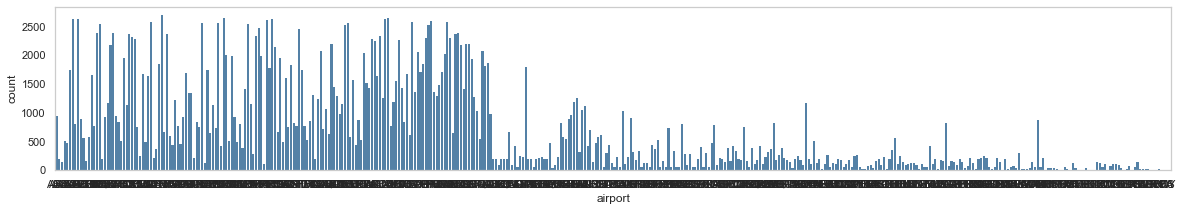

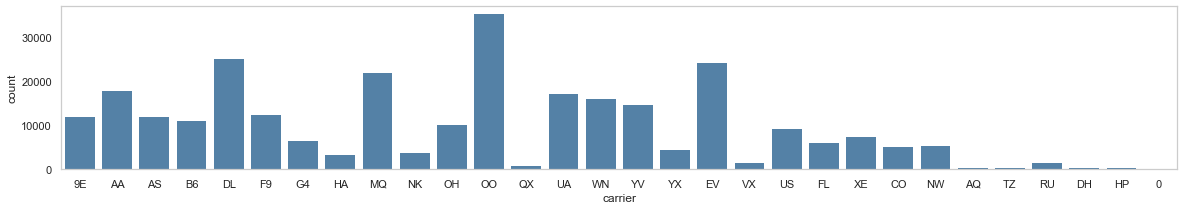

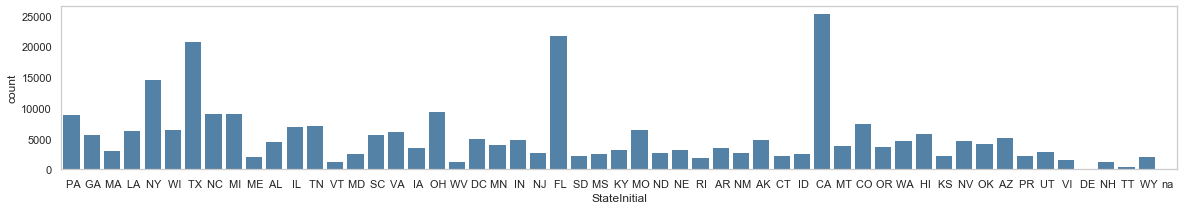

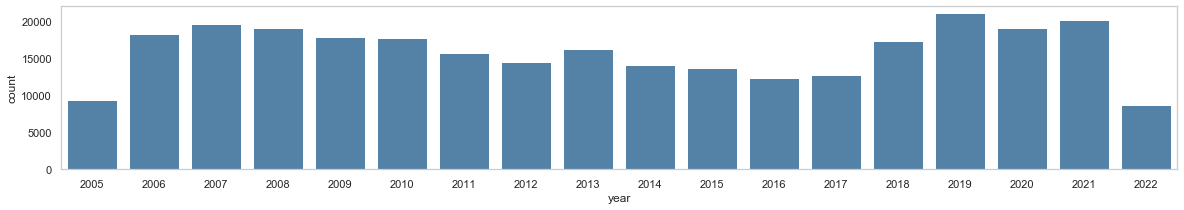

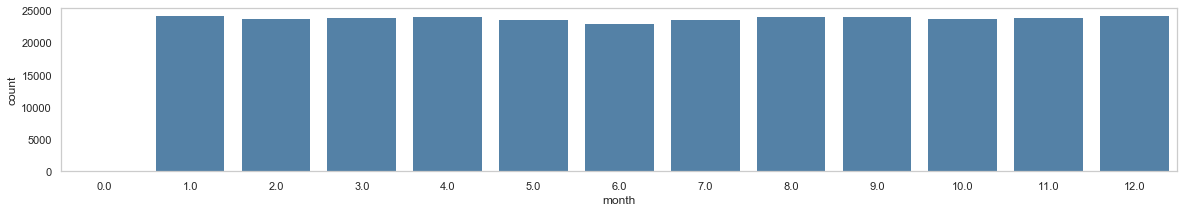

In [11]:
cat_cols = ['airport', 'carrier', 'StateInitial', 'year','month']
for col in cat_cols:
    if col in ['airport', 'carrier', 'StateInitial', 'year','month']:
        count_plot(df,col)

California, Florida, Texas, and New York have the most delays from most to least. SkyWest Airlines (OO), Delta Airlines (DL), Envoy Air (EV), American Airlines(AA), and United Airlines (UA) have the most delays in that order.

The data shows that the COVID years, 2019-2021, has the highest number of delays. 2022 does not have a full years worth of data. Based on this data, the delays have not returned to pre-COVID lows shown in 2014-2017. 

OO


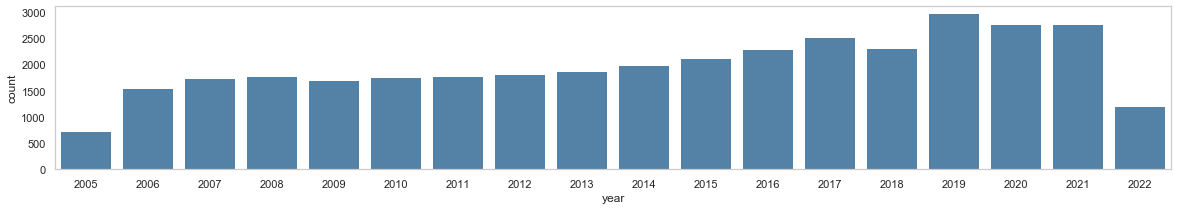

DL


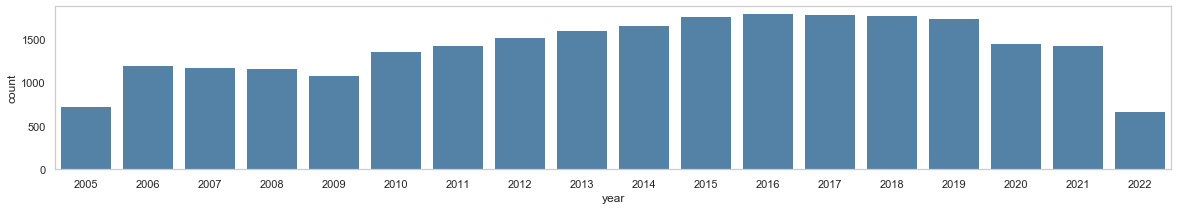

EV


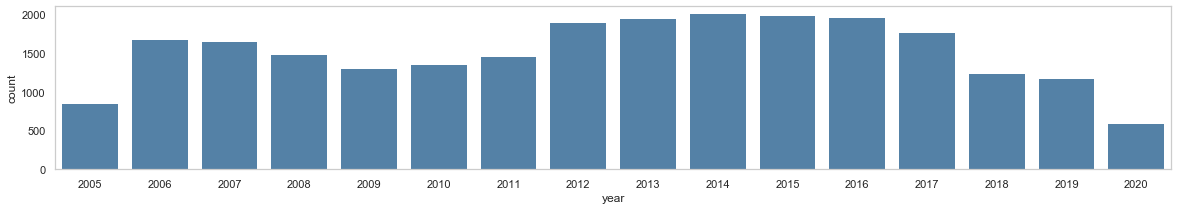

AA


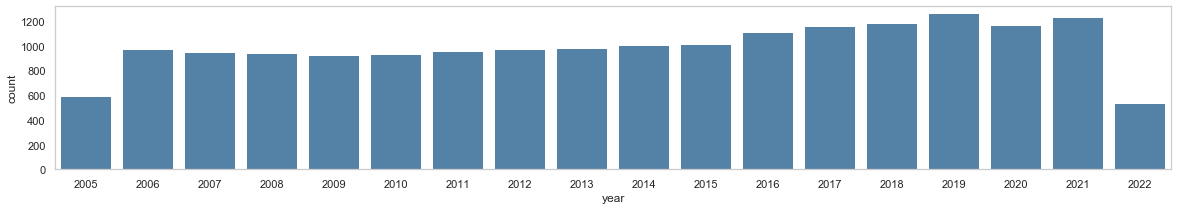

UA


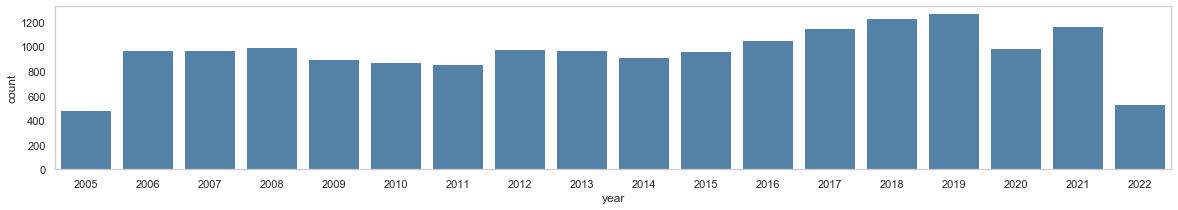

In [12]:
# Function to plot number of flights by airline delayed per year

airlines = ['OO','DL','EV','AA','UA']
for airline in airlines:
    print(airline)
    airline_df = df[df['carrier'].isin([airline])]
    for col in cat_cols:
        if col in ['year']:
            count_plot(airline_df,col)

SkyWest, American Airlines, and United Airlines had significant increase to number of delays during the COVID years, while Delta had decreased in delays during this time. Skywest had a 50-70% increase in quantity of flights delayed compared to the other big airlines (American Airlines, United Airlines, and Delta), with United Airlines and Delta having the least amount of delays during these years.

## Model Revision

In [13]:
# Standardizing all the numerical variables
from sklearn import preprocessing
Num_features=df.select_dtypes(include=[np.number]).columns
df[Num_features]=preprocessing.MinMaxScaler().fit_transform(df[Num_features])
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,StateInitial
0,1.0,0.416667,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.006188,0.001098,0.003320,0.000000,...,0.000530,0.000000,0.0,0.000588,0.001127,0.000000,0.000017,0.0,0.000196,PA
1,1.0,0.416667,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",0.004141,0.002509,0.004118,0.000000,...,0.003230,0.000000,0.0,0.002038,0.001782,0.000000,0.000340,0.0,0.003050,GA
2,1.0,0.416667,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",0.000865,0.000314,0.000073,0.000000,...,0.000467,0.000202,0.0,0.000318,0.000020,0.000000,0.000445,0.0,0.000189,MA
3,1.0,0.416667,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",0.004004,0.002195,0.004051,0.001185,...,0.000870,0.000000,0.0,0.002184,0.002970,0.000607,0.000524,0.0,0.001363,LA
4,1.0,0.416667,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",0.008236,0.002979,0.007723,0.000000,...,0.001108,0.000000,0.0,0.001863,0.003361,0.000000,0.000365,0.0,0.000398,GA


### Multiple Linear Regression

Multiple linear regression is a statisical analysis tool that models the relationship between a dependent variable and two or more independent variables. Using arr_delay as the depedendent, I found what independent variables have the most impact on arrival delays. I compared the following independent variables to understand which have the highest impact:
- carrier delay (carrier_delay)
- weather (weather_delay)
- NAS delays (nas_delay)
- later arriving aircraft (late_aircraft_delay)


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Create an instance of the LinearRegression class
regressor = LinearRegression()

X = df.loc[:,['carrier_delay','weather_delay', 'nas_delay', 'late_aircraft_delay']]
y = df.loc[:,'arr_delay']

# Fit the model to the data using the fit method
regressor.fit(X, y)

# Access the coefficients of the independent variables
coefficients = regressor.coef_

print(coefficients)

[0.45538378 0.13296596 0.5497114  0.34213784]


Based on Multiple Linear Regression, Carrier delays, NAS delays, and later arriving aircrafts, with 0.455, 0.549, and 0.342 coefficients respectively, have the most impact on the flight delays. Weather had minimal impact of flight delays. Air carriers delays are impacted by the flight crew issues which could be due to COVID staffing issues, but I can not determine this specfic information with this dataset.

I trained a linear regression model to predict how well this data determines flight delays. The model was trained with 75% of the data and test with the remain data. The prediction was then scored using the R-Squared metric.

R-squared value measures how well the regression line fits the data. It is calcuolted by taking the suared correlation between the observed data and the predicted data of the dependent variable. The value ranges from 0 to 1, where 0 indicates the regression line does nto fit the data, and 1 fits the the data perfectly.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Function input X and y data values and export R-squared value
# linear regression model
def LinearR(X, y):
    # Get column names
    cols = X.columns
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Train model
    regressor.fit(X_train, y_train)

    # Get predicted values
    y_pred = regressor.predict(X_test)

    # Evaluate the model using R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Evaluate the model using MSE or MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Plot the data
    #plt.scatter(X_test, y_test)

    
    # Add the red R-squared line to the plot
    #plt.plot(X_test, y_pred, color='red', label='R-squared: {:.2f}'.format(r2))

    print('Using dependent variables {} the following metrics are: R-squared: {:.4f}, mean squared error: {:.4f}, and mean absolute error: {:.4f},'.format(cols,r2,mse,mae))

In [17]:
# Load all three dependent variables
X = df.loc[:,['carrier_delay','nas_delay', 'late_aircraft_delay']]
y = df.loc[:,'arr_delay']
LinearR(X,y) 

Using dependent variables Index(['carrier_delay', 'nas_delay', 'late_aircraft_delay'], dtype='object') the following metrics are: R-squared: 0.9979, mean squared error: 0.0000, and mean absolute error: 0.0004,


In [18]:
# Load only nas_delay
X = df.loc[:,['nas_delay']]
y = df.loc[:,'arr_delay']
LinearR(X,y) 

Using dependent variables Index(['nas_delay'], dtype='object') the following metrics are: R-squared: 0.7627, mean squared error: 0.0002, and mean absolute error: 0.0051,


In [19]:
# Load nas_delay and carrier delay
X = df.loc[:,['carrier_delay','nas_delay']]
y = df.loc[:,'arr_delay']
LinearR(X,y) 

Using dependent variables Index(['carrier_delay', 'nas_delay'], dtype='object') the following metrics are: R-squared: 0.9606, mean squared error: 0.0000, and mean absolute error: 0.0019,


Based on the results above, Carrier and Nas delay provide most of the prediction value in the model to determine if a carriers delay time.

### Support Vector Machine
The linear regression reuslts above were compared to support vector machine (SVM). This is another supervised learning model to perform regresson analysis and classification.

In [20]:
from sklearn.svm import SVR

# Function input X and y data values and export R-squared value
# SVM model
def SVM(X, y):
    # Get column names
    cols = X.columns
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # SVM classifier
    regressor = SVR()
    
    # Train model
    regressor.fit(X_train, y_train)

    # Get predicted values
    y_pred = regressor.predict(X_test)

    # Evaluate the model using R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Evaluate the model using MSE or MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Plot the data
    #plt.scatter(X_test, y_test)

    
    # Add the red R-squared line to the plot
    #plt.plot(X_test, y_pred, color='red', label='R-squared: {:.2f}'.format(r2))

    print('Using dependent variables {} the following metrics are: R-squared: {:.4f}, mean squared error: {:.4f}, and mean absolute error: {:.4f},'.format(cols,r2,mse,mae))

In [21]:
# Load nas_delay and carrier delay
X = df.loc[:,['carrier_delay','nas_delay']]
y = df.loc[:,'arr_delay']
SVM(X,y) 

Using dependent variables Index(['carrier_delay', 'nas_delay'], dtype='object') the following metrics are: R-squared: -7.8976, mean squared error: 0.0073, and mean absolute error: 0.0844,


The mean square and absolute error of the SVM are similar to the linear regression, but the R-squared value is negative. There is some issue entering the dataset in to the SVM aglorithm, because the value should be between 0 to 1. 

### Hopkins Statistic
Hopkins statistic measures tendency for the data to cluster, which helps determines the likelihood that a given dataset contains meaningful clusters.

In [22]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# Hopkins Statistic
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
# Use a random sample of Data for faster computation
df_random = df.sample(100,random_state=41)

# Reset index for the dataframe
df_random = df_random.reset_index(drop=True)

# Create matrix with only numerical features for Hopkins test
Num_features = df_random.select_dtypes(include=[np.number]).columns
hopkins(df[Num_features])

This test was run (code: (MATEVZKUNAVER, 2017)) for the numerical variables in this dataset. The Hokpins statistic is 0.99, so the data has a high tendency for clustering.

## Full Analysis

Let's reflect back on the questions proposed in the results of this study.

#### How many flights are delayed
There was an increase in delays during the years of the COVID-19 epidemic (2019-2021).

#### The top three causes for the delays
The specific reasons were hard to determine from the data used in this study, but it can be said that there were significantly more delays attributed to the national aviation system (NAS) that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

#### Ranking airlines by most delayed
With the focus on the major airline chains, SkyWest Airlines (OO), Delta Airlines (DL), Envoy Air (EV), American Airlines(AA), and United Airlines (UA) have the most delays in that order.

#### Has the frequency delays decreased over the years
The data used in this study could not determine if the frequency of delays decreases, because the data was only collected until May 2022.

For future investigation, it would be recommended to use data from the entire 2022 and specifically track if there was a decrease in delays from NAS related incidents.


# References
- MATEVZKUNAVER. (2017, June 20). Hopkins test for cluster tendency. Retrieved May 2019, from Wordpress.com:https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-clustertendency/

- RYANJT. (2022 August). Airline Delay Cause. Retrieved September 2022, from:https://www.kaggle.com/datasets/ryanyjt/airline-delay-cause

- (2022 July 12). U.S. Passenger Carrier Delay Costs. Retrieved November 2022, from:https://www.airlines.org/dataset/u-s-passenger-carrier-delay-costs/

- Machine Learning - Mulitple Regression. Retrieved November 2022, from W3Schools:https://www.w3schools.com/python/python_ml_multiple_regression.asp